# COMP411 Project Demo: Image Super-Resolution with Deep Internal Learning of Image Pairs

## Emre Can Açıkgöz
## Cansu Korkmaz

# Imports

In [2]:
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import cv2

from Model.model_hgsr import HourGlassNetMultiScaleInt
from loss import get_content_loss, GW_loss
from simplenet import simpleNet

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


# Data

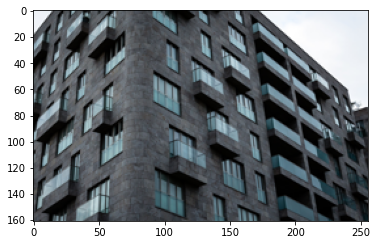

In [13]:
#X = cv2.imread('/home/mandalinadagi/Desktop/comp511/img001x4.png')
#Y = cv2.imread('/home/mandalinadagi/Desktop/comp511/img001.png')
X = cv2.imread('/home/emrecan/Desktop/Comp411/data/Urban100/img_001_SRF_4_LR.png')[:,:,::-1]
Y = cv2.imread('/home/emrecan/Desktop/Comp411/data/Urban100/img_001_SRF_4_HR.png')[:,:,::-1]
save_path = '/home/emrecan/Desktop/Comp411/Comp411-511_Project/demo.pt'
plt.imshow(X);

float64
X: (160, 256, 3)
Y: (640, 1024, 3)


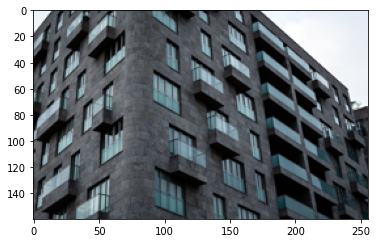

In [4]:
wx, hx, c = X.shape
wx = (wx//4)*4
hx = (hx//4)*4
X = X[:wx, :hx, :]
Y = Y[:(4*wx), :(4*hx), :]
X_original = X
Y_original = Y
X = X.astype(float)
Y = Y.astype(float)
X /= 255.0
Y /= 255.0
print(X.dtype)
plt.imshow(X);
print(f"X: {X.shape}")
print(f"Y: {Y.shape}")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


lr_son: (40, 64, 3)


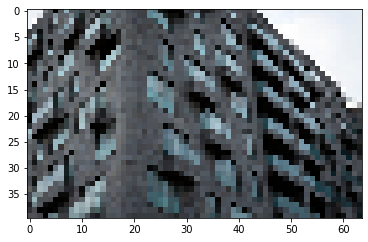

In [5]:
# Bi-CUBIC interpolation
lr_son = cv2.resize(X, None,fx=0.25, fy=0.25, interpolation=cv2.INTER_CUBIC)
plt.imshow(lr_son);
print(f"lr_son: {lr_son.shape}")

In [6]:
lr_son_tensor = torch.FloatTensor(lr_son)
lr_father_tensor = torch.FloatTensor(X)
HR_tensor = torch.FloatTensor(Y)
print(f"lr_son_tensor type: {lr_son_tensor.type()}, lr_father_tensor type: {lr_father_tensor.type()}, HR_tensor type: {HR_tensor.type()}")

lr_son_tensor type: torch.FloatTensor, lr_father_tensor type: torch.FloatTensor, HR_tensor type: torch.FloatTensor


In [7]:
print(f"lr_son: {lr_son_tensor.shape}, lr_father: {lr_father_tensor.shape}, HR: {HR_tensor.shape}")
lr_son, lr_father, HR = lr_son_tensor.unsqueeze(0), lr_father_tensor.unsqueeze(0), HR_tensor.unsqueeze(0)
print(f"lr_son: {lr_son.shape}, lr_father: {lr_father.shape}, HR: {HR.shape}")

lr_son: torch.Size([40, 64, 3]), lr_father: torch.Size([160, 256, 3]), HR: torch.Size([640, 1024, 3])
lr_son: torch.Size([1, 40, 64, 3]), lr_father: torch.Size([1, 160, 256, 3]), HR: torch.Size([1, 640, 1024, 3])


In [8]:
lr_son, lr_father, HR = lr_son.permute(0, 3, 1, 2), lr_father.permute(0, 3, 1, 2), HR.permute(0, 3, 1, 2)
print(f"lr_son: {lr_son.shape}, lr_father: {lr_father.shape}, HR: {HR.shape}")

lr_son: torch.Size([1, 3, 40, 64]), lr_father: torch.Size([1, 3, 160, 256]), HR: torch.Size([1, 3, 640, 1024])


# Inference

In [15]:
model = torch.load(save_path)

In [26]:
inp = lr_father.to(device)
print(inp.shape)
outp = model(inp)
outp2 = outp.permute(0, 2, 3, 1).squeeze(0)
print(pred3.shape)

torch.Size([1, 3, 160, 256])
torch.Size([640, 1024, 3])


In [27]:
outp3 = outp2.cpu().detach().numpy()

Generated Output Shape: (640, 1024, 3), Input shape: torch.Size([1, 3, 160, 256])


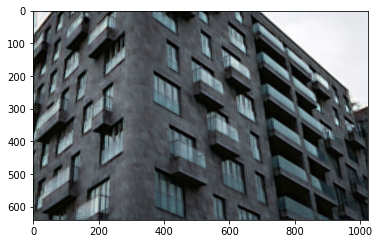

In [28]:
outp4 = np.clip(outp3, 0, 1)*255
outp5 = np.uint8(outp4)
plt.imshow(outp5);
print(f"Generated Output Shape: {outp5.shape}, Input shape: {inp.shape}")